
https://github.com/iurisegtovich/PyTherm-applied-thermodynamics
https://kyleniemeyer.github.io/computational-thermo/content/intro.html


PV = NkT

dU = TdS - pdV

U = 3/2 N K T

differentiation keeping fixed

Gibbs liked entropy energy volume?


Is one coordinate system better than others? Probably.


Schaum's seemed pretty good


Could we plot the Maxwell surface?



PH and activity.

PV=nRT
dU = TdS - pdV
U = 3/2 N k T = 3/2 P V
dU = V dp/ds ds - p dV

dP/dS|v = 3/2 T



du/ds|v = T



Or van der waals


The abstract notion of state.
There is no meaning to state. These are arbitrary parameters.
But in an ordinary fluid, there are two.
all the others may be expressed as a function of these two.

spans and cospans as thermodynamic relations

There are 2 dimensional generators and many properties that are functions of them


chemical potential
how much energy does the system receive when we stick stuff into the fixed size chamber of entropy 0. (abolsute zero)




https://www.sciencedirect.com/science/article/abs/pii/S0378381216301893
a numerical thingo. gibbs kanaalalelvl equation? never heard of it.
Seems kind of like clasius clapeyron




In [1]:
from sympy import *

In [112]:
u,s,t,p,v,n,r = symbols("u s t p v n r")

du,ds,dt,dp,dv = symbols("du ds dt dp dv")
# taylor series in stuff?

e1 = p * v - n * r * t
e2 = u - Rational(3 , 2) * n * r * t

state = [  (u,du), (s,ds), (t,dt) , (p,dp) , (v,dv) ]

def differential(e):
    return sum( [ diff(e,x) * dx  for x,dx in state]   )


de1 = differential(e1 )
de2 = differential(e2 )

e3 = du - (t * ds - p * dv)

eqs = [e1,e2,de1,de2,e3]
print(eqs)
G = groebner( eqs, u , du,  t, dt, p, dp, v, dv,  ds )
for e in G:
    print(e)
    
    
'''
What makes an equation ok to integrate?
This order makes and equations with p,v,dp,ds,dv.  Because I know there are only two free variables, 
I can integratet this equation giving the S = lnV + ln P form.

'''    

# du - t ds - p * dv   ?? If I allow more variables this is no longer true. Or is it?

# But.... Ok, I could isolate dS, fine.


# going differential introduces 2 new variables. The differentials are connected by tangency conditions.
# We indeed are literally describing the tangent bundle in coordinates.

#(dv = 0, du - t * ds)
#(ds = 0, du - p * dv)


# This does seem more in the flavor of lie methods. This suggestion now is we should solve via symmettry generators?
# du * partial f + dv * partial f = flow
#  psi * partialu (e1) + psi partials e1 
# e2, e3, e4, 
# 




[-n*r*t + p*v, -3*n*r*t/2 + u, dp*v - dt*n*r + dv*p, -3*dt*n*r/2 + du, -ds*t + du + dv*p]
-3*p*v/2 + u
-3*dp*v/2 + du - 3*dv*p/2
n*r*t - p*v
-dp*v + dt*n*r - dv*p
-3*dp*n*r*v/2 + ds*p*v - 5*dv*n*p*r/2


In [59]:
R = Rational
U,S,T,P,V,N, k = symbols("U S T P V N k")

cv = R(3,2) * N * k
e1 = U - cv * T
e2 = P * V - N * k * T
e3 = S - cv * ln(T) + N * k * ln(V)

elim = [P,T]
Ps = solve([e1,e2,e3], P)
Ps
es = [ e.subs(Ps) for e in [e1,e2,e3] ]
Ts = solve(e3, T)[0]
es = [  e.subs(T,Ts) for e in es ]
Usv = solve(es[0],U)[0]
psv = diff(Usv,V)
tsv = diff( Usv , S )

#solve(es[0], V)

Hsv = Usv + P * V  # enthalpy and legendre trnasformation
Vps = solve(diff(Hsv, V) , V) 
H =  Hsv.subs(V, Vps[0]) 
simplify(H)

-N**3*k**3*exp(2*S/(N*k))/P**2 + 3*N*k*(-N**3*k**3*exp(2*S/(N*k))/P**3)**(2/3)*exp(2*S/(3*N*k))/2

In [79]:


def legendre(L, v, p):
    H1 = L - p * v
    v1 = solve( diff(H1,v), v )
    if type(v1) == list:
        v1 = v1[0]
    print(v1)
    print(diff(H1,v))
    print(simplify(diff(H1,v).subs(v, v1)))
    assert(  simplify(diff(H1,v).subs(v, v1) ).is_zero  ) # sanity check
    return H1.subs(v, v1)

v, p =  symbols("v p", real=True)
L = Rational(3,2)*v*v
H = legendre( L , v, p )
legendre(H, p, v) # inverts back to original


L = Rational(3,2)*v*v*v*v
H = legendre( L , v, p )
print("H", H)
legendre(H, p, v)


p/3
-p + 3*v
0
-3*v
-p/3 - v
0
6**(2/3)*p**(1/3)/6
-p + 6*v**3
0
H -6**(2/3)*p**(4/3)/8
-6*v**3
-6**(2/3)*p**(1/3)/6 - v
-v - (-v**3)**(1/3)


AssertionError: 

Mechanics. like SICP.


Can we go point free?





In [ ]:
x_ = Function("x")
t = symbols("t")

def Gamma(x):
    d = x
    n = 0
    while True:
        yield diff( x, (t,n) )
        n += 1
        
def compose(f,g):
    return Lambda

In [37]:

Lambda(x,x).func
Lambda((x,p), x)( 3,4 )
Lambda(x,x)(3)



In [ ]:
# simple harmonic oscillator lagrangian style
m, k = symbols("m k", real = True, positive=True)
v, q = symbols("v q")
K = Rational(1,2) * m * v ** 2 #kinetic energy
V = Rational(1,2) * k * q ** 2 # potential energy
L =  K - V  #Lagrangian
F = diff(L,q) # force
p = diff(L,v) # momentum

x_ = Function("x")
t = symbols("t")

x = x_(t)

subst = { v : diff(x,t),
         q : x} # replacement to turn q into a function x

# euler-lagrange equations of motion
eq = F.subs( subst ) - diff( p.subs(subst)  , t )
dsolve(eq) # general solution cosine and sines

In [ ]:
# legendre transformation to hamiltonian
p = symbols( "p" )
H_ = p * v - L # hamiltonian but we haven't solved out v yet
v_of_pq = solve(diff(H_, v), v)[0] # set derivative to 0 to solve for v.
H = simplify(H_.subs(v, v_of_pq )) # substitue back in. Here is the actual hamiltonian
H

Man basic physics is so good.

Modern physics book


P=IV
V=IR
3 variables, but only 1 independent



Elephant problem - grobner basis for spacetime. propertime**2 = yada

What does expansion mean
Headlight problem
twin
ray tracing


WKB appromxation
Canonical Tranfromations
poisson brackets
cross product. L = r x p. Why is angular momentum a matrix?


Hamiltonian => lagrangian is a legendre. Why
H = pv - L


optics : how big does a pinholes have to be

rutherford scattering
hard sphere scattering





Functions spaces:
wassrestein/earth moves distance of function sets. 
earth mover is a good distance metric of two sets.
So If I wanted an approximate solution set of a differential equation
By what metric?


Virial expansion?


In [3]:
from sympy import *

In [5]:
#elephant problem

tau , t1, t2, x1, v, c, T = symbols("tau t1 t2 c1 v c T")

eqs = [
    tau**2 - (t1**2 - x1**2 / c**2),
    x1 - v * t1,
    c * t2 - x1,
    T - t1 - t2,
    tau - 21
    
]

groebner(eqs, tau , t1, t2, x1, v, T)



GroebnerBasis([tau - 21, -T + t1 + c1/c, t2 - c1/c, -T*c*v + c*c1 + c1*v, -T**2*c/2 + T*c1 + 441*c/2, -T**2*c + T**2*v + 441*c + 441*v], tau, t1, t2, c1, v, T, domain='ZZ(c)', order='lex')

In [2]:
from sympy import *

In [14]:
def avg_energy(Z):
    return - diff(ln(Z), beta).subs(beta, 1/ kb / T)
def heat_capacity_v(Z):
    return diff(avg_energy(Z), T)
#def pressure(Z):
#    return -diff(avg_energy(Z) , V)

In [87]:
# ideal gas partition function

beta, m, V, N, kb, T  = symbols("beta m V N k_b T", real=True, positive=True)
p = symbols("p", real=True)
Z = integrate( exp( - beta * Rational(1,2) * p ** 2 / m ), (p,-oo,oo))**(3*N) * V**N #partition function

def avg_energy(Z):
    return - diff(ln(Z), beta).subs(beta, 1/ kb / T)
print(avg_energy(Z)) #
F = (-ln(Z) / beta).subs(beta, 1 / kb / T) #helmholtz free energy

S = diff(F , T) # sentropy is derivative of helmholtz wrt T
S # the functional dependence on T and V I think is correct

P = -diff(F , V) # pressure is - derivative of V
P
# Neato

3*N*T*k_b/2


N*T*k_b/V

In [48]:
H = Function("H")
prob = exp(-beta * H(p))  / integrate(exp(-beta * H(p)) , (p, -oo,oo)  ) / V
prob

S1 = simplify(expand(integrate(ln(prob)*prob , (p,-oo,oo)) * V))

# we can see I think that the entropy is the same thing as 

In [49]:
S2 = simplify(diff((ln(integrate(exp(-beta * H(p)) , (p, -oo,oo)  ) * V) / beta).subs(beta , 1 / kb / T),T))

In [51]:
simplify(S1.subs(beta, 1 / kb/ T) - S2)

-k_b*log(V*Integral(exp(-H(p)/(T*k_b)), (p, -oo, oo))) - log(V) + Integral(exp(-H(p)/(T*k_b))*log(exp(-H(p)/(T*k_b))/Integral(exp(-H(p)/(T*k_b)), (p, -oo, oo))), (p, -oo, oo))/Integral(exp(-H(p)/(T*k_b)), (p, -oo, oo)) - Integral(H(p)*exp(-H(p)/(T*k_b)), (p, -oo, oo))/(T*Integral(exp(-H(p)/(T*k_b)), (p, -oo, oo)))

In [56]:
# ideal gas partition function
# Uhh. Yeah. TRight?
# No actuall this one is the gibbs and the other was the helmholtz

beta, m, V, N, kb, T, P  = symbols("beta m V N k_b T P", real=True, positive=True)
p = symbols("p", real=True)
Z = integrate(integrate( exp( - beta * (Rational(1,2) * p ** 2 / m  + P * V)), (p,-oo,oo)),(V,0,oo))**N #partition function
#diff(ln(Z), beta) # energy
#diff(ln(Z), beta, 2)
avg_energy(Z)
G = -(ln(Z)/beta).subs(beta, 1 / kb/ T)
diff(G, P) # volume
diff(G, T) # entropy
G
#-(diff(ln(Z),P) / beta ).subs(beta, 1 / kb/ T)


-T*k_b*log((sqrt(2)*sqrt(pi)*T**(3/2)*k_b**(3/2)*sqrt(m)/P)**N)

In [135]:
# hamrmonic oscillator partition function
beta, m, k = symbols("beta m k ", real=True, positive=True)
p, x = symbols("p x", real=True)
E = R(1,2) * p ** 2 / m  + R(1,2) * k * x ** 2
Z = integrate( integrate( exp( - beta * E ), (p,-oo,oo)) , (x,-oo, oo))**N 
diff(-ln(Z),beta)



N/beta

In [62]:
# hamrmonic oscillator partition function
beta, m, k, F = symbols("beta m k F", real=True, positive=True)
p, x = symbols("p x", real=True)
E = Rational(1,2) * p ** 2 / m  + Rational(1,2) * k * x ** 2 + F * x
Z = integrate( integrate( exp( - beta * E ), (p,-oo,oo)) , (x,-oo, oo))**N 
diff(-ln(Z),beta)
simplify(diff(ln(Z), F, 2)/beta/beta) # <x^2> 


N/(beta*k)

In [64]:
simplify(integrate(exp(-x*x + x), (x,-oo,oo))) # what is this trash

sqrt(pi)*exp(1/4)

In [82]:
def differential(e, *xs):
    dxs = [symbols('d' + x.name, commutative=True)  for x in xs] # are differential ordinary numbers or one-forms?
    return sum([  diff(e,x) * dx for x,dx in zip(xs,dxs) ]) , dxs
x,y,z = symbols("x y z")

df, dxs = differential(2*x + y, x,y,z)
simplify(df / dxs[0])

2 + dy*dx**(-1)

In [83]:
def exterior(e, *xs):
    dxs = [symbols('d' + x.name, commutative=False)  for x in xs] # are differential ordinary numbers or one-forms?
    return sum([  diff(e,x) * dx for x,dx in zip(xs,dxs) ]) , dxs

dx, dy, dz = symbols("dx dy dz")
exterior( x * dy - y * dx , x,y,z) # ooh that's fun


(-dx*dy + dy*dx, [dx, dy, dz])

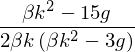

In [20]:
# pertubration theory of anharmonic oscillator
init_printing()
# hamrmonic oscillator partition function
beta, m, k, g = symbols("beta m k g ", real=True, positive=True)
p, x = symbols("p x", real=True)
E = Rational(1,2) * ( p ** 2 / m  +  k * x ** 2) + g * x ** 4
series(exp( - beta * E ), g).removeO()
Z = integrate( integrate( series(exp( - beta * E ), g, n=2).removeO(), (p,-oo,oo)) , (x,-oo, oo))
simplify(diff(-ln(Z),beta)) #E
simplify(diff(-ln(Z),k)/beta) #<x**> 


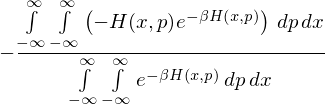

In [27]:
H = Function("H")
-diff(ln(integrate( integrate( exp( - beta * H(x,p) ), (p,-oo,oo)) , (x,-oo, oo))), beta)

In [137]:
# single spin
Z = exp(beta) + exp(-beta)
diff(ln(Z), beta)

# what else was there?
# 


(exp(beta) - exp(-beta))/(exp(beta) + exp(-beta))

In [144]:
# self consistent Weiss mean field thing
B = symbols('B', real=True)
Z = exp(beta * B ) + exp(-beta * B)
lambdify(diff(ln(Z), beta)/B - B, [B , beta])
# plot

SyntaxError: invalid syntax (<lambdifygenerated-2>, line 1)

In [108]:
L, H , v, p, dv, dL = symbols('L H v p dv dL')

e1 = L - v*v*v*v + v * v
de1 = diff(e1,L)*dL + diff(e1,v)*dv
e2 = dL - p*dv
e3 =  (L - p * v) - H

eqs = [e1,de1,e2,e3]

for G in groebner(eqs,  v, L, dL, H , p, dv):
    print(factor(G))



-L + v**4 - v**2
-H*v**3 + H*v - L*p + L*v**3 - L*v
H**2*v**2 - H**2 - 2*H*L*v**2 + 2*H*L + L**2*v**2 - L**2 - L*p**2
dv*(H + 3*L + 2*v**2)
-H**3*v + 3*H**2*L*v - H**2*p - 3*H*L**2*v + 2*H*L*p + L**3*v - L**2*p - L*p**3
dv*(H*p + 3*L*p + 8*L*v + p + 2*v)
-dv*(3*H*p - 8*H*v + 9*L*p - p - 2*v)
H - L + p*v
H**4 - 4*H**3*L + 6*H**2*L**2 - H**2*p**2 - 4*H*L**3 + 2*H*L*p**2 + L**4 - L**2*p**2 - L*p**4
dv*(-4*H**2 - 2*H + 36*L**2 + 10*L + 3*p**2)
-dv*(-8*H**2 - 24*H*L - 10*H + 2*L + 3*p**2)
dv*(32*H**2 + 9*H*p**2 + 16*H + 27*L*p**2 - 8*L - 6*p**2)
dL - dv*p
dv*(256*H**3 + 128*H**2 - 144*H*p**2 + 16*H + 27*p**4 - 4*p**2)


In [88]:
refine(-v - (v**3)**(R(1,3)))

-v - Abs(v)

In [87]:
refine(-(v**3)**(R(1,3)))

-Abs(v)

https://stackoverflow.com/questions/48709140/is-it-possible-to-construct-symbols-in-sympy-that-anticommute

If we were on a polynomial surface, we'd be working modulo those equations.
`x**2 + y**2 + z**2 - 1`

We could take exteriori derivatives of bases modulo 


The dx dy dz equations make the tangent bundle concept quite literal.
setting dx = dy = dz = 0 make the projection to the base space.





In [13]:
dx,dy,dz = symbols("dx dy dz", commutative = False)
anti = {
    dx * dx : 0,
    dy * dy : 0,
    dz * dz : 0,
    dy * dx : -dx * dy,
    dz * dy : -dy * dz,
    dz * dx : -dx * dz,
    
}


In [16]:
(dx * dy * dz * dy).subs(anti).subs(anti)

0

In [17]:
(dy * dx * dz  + 2 * dy * dz * dx ).subs(anti).subs(anti)

dx*dy*dz

In [21]:
def exterior(e):
    return (dx * diff(e, x) +  dy * diff(e, y) +  dz * diff(e, z)).subs(anti).subs(anti)

In [33]:
x,y,z = symbols("x y z")
exterior(x * dx + y * dy + z * dz)
exterior(x * dy )
exterior(x * dy - y * dx )

2*dx*dy

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

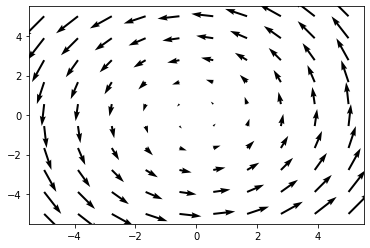

In [51]:
x,y = np.meshgrid(np.linspace(-5,5,10),np.linspace(-5,5,10))

u = -y
v = x

plt.quiver(x,y,u,v)
plt.show()

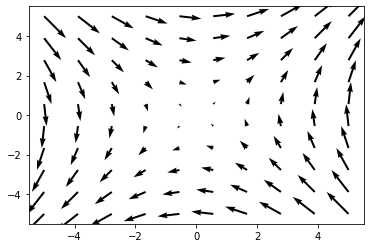

In [52]:
x,y = np.meshgrid(np.linspace(-5,5,10),np.linspace(-5,5,10))

u = y
v = x

plt.quiver(x,y,u,v)
plt.show()

What about the anti differentiation problem?
Well, if we discretize it's kind of straight forward - discrete exterior claculus
Becomes a linear problem
Also if polynomial, not so bad.
Otherwise, me dunno. The mysteries of the symbolic antidifferentiaion process.

Given 

3 derivatives:
metrical/covaraint
exterior
Lie



Lie derivative of differential equations themselves. -> symmettries
Using the differential equations as the flow field  -> invaraints of flow

And these are related?

https://docs.sympy.org/latest/modules/diffgeom.html



In [ ]:
diff( f(x + t * vx, y + t * vy), t).subs(t,0) # this is the vector  

In [30]:
def lie(e,v): # directional derivative
    return sum( v * diff(e,x)   for v, x in zip(v , variables)]) 

def prolongation(e):
    # replace all derivatives with fresh variables
    # But also note that this induces a constraint on the form of the lie derivative
    # 

    
    
xreplace()    
    

dx <= x

In [ ]:
import numpy as np
e = np.eye(3)
def exterior(v,w):
    len(v.shape)
    # but outer doesn't work like I'd want. Manually reshape afterward?
    return np.outer(v,w) +  (- 1 ** len(w.shape)) * np.outer(w,v) 



In [39]:
x = Function("x")
t, a = symbols("t a")
dsolve(diff(x(t),t,2) - a)

Eq(x(t), C1 + C2*t + a*t**2/2)

In [41]:
dsolve(diff(x(t),t,2) + x(t))

Eq(x(t), C1*sin(t) + C2*cos(t))

In [42]:
dsolve(diff(x(t),t,2) - t**2 * x(t))

Eq(x(t), C2*(t**4/12 + 1) + C1*t*(t**4/20 + 1) + O(t**6))

In [43]:
dsolve(diff(x(t),t,2) + x(t))

Eq(x(t), C1*sin(t) + C2*cos(t))

In [44]:
series(sin(t))

t - t**3/6 + t**5/120 + O(t**6)

In [45]:
series(1/(1-t))

1 + t + t**2 + t**3 + t**4 + t**5 + O(t**6)

Yeah formal power series brings in something else. I think they can be infinite stream backed.

In [49]:
fps(sin(t))

FormalPowerSeries(sin(t), t, 0, 1, (SeqFormula(Piecewise(((-1/4)**(_k/2 - 1/2)/(RisingFactorial(3/2, _k/2 - 1/2)*factorial(_k/2 - 1/2)), Eq(Mod(_k, 2), 1)), (0, True)), (_k, 2, oo)), SeqFormula(t**_k, (_k, 0, oo)), t))

In [59]:
eta = Function("eta")
psi = Function("psi")
phi = Function("phi")
f = Function("f")
x,y,t = symbols("x y t")
diff(  f(x + t * eta(x,y), y + t * psi(x,y)  )  ,  t).subs(t,0)


eta(x, y)*Subs(Derivative(f(_xi_1, y), _xi_1), (_xi_1,), (x,)) + psi(x, y)*Subs(Derivative(f(x, _xi_2), _xi_2), (_xi_2,), (y,))

f(x,y,p) 


d (dy/dx) * del_p

 psi del x + phi dely + (psi del_x f + phi del_y f) delp g(x,y,f(x,y))
 
psi del x + phi dely + (psi del_x f + phi del_y f) delp g(x,f(x),f'(x))



F(x,y,p) = 0
==> derives (understand derivatives)
dx delx F + dy dely F + dp delp F = 0 (introduces 3 new variables, 1 equation, linear in the ds, so there is an overall uninteresting scale)
+
dx * p = dy


psi as functions seems odd.







# Quantum



In [47]:
x, y = symbols("x y", real=True)
z = x + I * y
#def diffz(psi):
zbar = conjugate(z)  
def diffz(psi): # does this even really make sense?
    return diff(psi, x) + I * diff(psi,y)

B, lb, hbar = symbols("B lb hbar")
psi = simplify(exp(- z * zbar))

H, p, A = symbols("H p A")
H = (p + A)**2


def curl(A):
    return diff(A[0],y) - diff(A[1],x) 


In [66]:
A = MatrixSymbol("A", 2,1)
p = MatrixSymbol("p", 2,1)
sum((A + p).T * (A + p))





In [67]:
curl(A)

In [ ]:
A = Function("A")
FunctionMatrix(2,1, A)


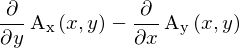

In [76]:
Ax = Function("A_x")
Ay = Function("A_y")
A = Matrix([ Ax(x,y), Ay(x,y) ])
curl(A)

In [85]:
def div(A , *xs):
    return sum( [  diff(a,x) for a,x in zip(A,xs) ]  ) 
def jac(A, *xs):
    return Matrix([[  diff(a,x) for a in A ] for x in xs ])
def grad(f, *xs):
    return Matrix([  diff(f, x) for x in xs ])

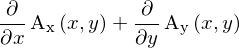

In [79]:
div(A, x, y)

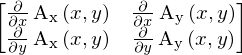

In [81]:
jac(A,x,y)

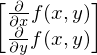

In [86]:
f = Function("f")
grad(f(x,y), x,  y)

In [110]:
f(x,y).fdiff(2)
diff(f(x,y), )

ValueError: 
Since there is more than one variable in the expression, the
variable(s) of differentiation must be supplied to differentiate f(x,
y)

In [95]:
Lambda((x,y), f(x,y))
z = symbols("z")
Lambda((x,y,z), y)


Lambda( ((x , y) , z) , y  )


TypeError: not all arguments converted during string formatting

In [115]:
Lambda( x , (x,x,x)  )

In [142]:
def compose(f,g):
    return Lambda( g.variables, f(g(*g.variables)) )


In [156]:
type(Lambda(x,x))
Id = functions.elementary.miscellaneous.IdentityFunction()
#Id()(x)
Id(x)
Fst = Lambda( (x,y) , x )
Snd = Lambda( (x,y) , y )
#def fan(f,g):
    # hmm. That deeply nest tuples dosen't work as advertised is a bummer
#    return Lambda( g.variables, f(g(*g.variables)) )


#Curry = Lambda( x,  x  ) # hmm. ok it's not a higher order lambda calculus either. Pretty limitted really


compose(Id,Id)

In [144]:
compose(Lambda( x, (x,x)  ) , Lambda((x,y) , y ))

In [134]:
help(Lambda( (x,y,z) ,  y )  )

Help on Lambda in module sympy.core.function object:

class Lambda(sympy.core.expr.Expr)
 |  Lambda(variables, expr)
 |  
 |  Lambda(x, expr) represents a lambda function similar to Python's
 |  'lambda x: expr'. A function of several variables is written as
 |  Lambda((x, y, ...), expr).
 |  
 |  A simple example:
 |  
 |  >>> from sympy import Lambda
 |  >>> from sympy.abc import x
 |  >>> f = Lambda(x, x**2)
 |  >>> f(4)
 |  16
 |  
 |  For multivariate functions, use:
 |  
 |  >>> from sympy.abc import y, z, t
 |  >>> f2 = Lambda((x, y, z, t), x + y**z + t**z)
 |  >>> f2(1, 2, 3, 4)
 |  73
 |  
 |  A handy shortcut for lots of arguments:
 |  
 |  >>> p = x, y, z
 |  >>> f = Lambda(p, x + y*z)
 |  >>> f(*p)
 |  x + y*z
 |  
 |  Method resolution order:
 |      Lambda
 |      sympy.core.expr.Expr
 |      sympy.core.basic.Basic
 |      sympy.core.evalf.EvalfMixin
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __call__(self, *args)
 |      Call self as a function.
 |  

In [135]:
Lambda( (x,y,z) ,  y ).variables
Lambda( (x,y,z) ,  y ).canonical_variables
Lambda( (x,y,z) ,  y ).expr


In [ ]:
sigx = np.a
property bound_symbols
The variables used in the internal representation of the function

property expr
The return value of the function

property is_identity
Return True if this Lambda is an identity function.

property signature
The expected form of the arguments to be unpacked into variables

property variables

In [138]:
f(x,y).expr

AttributeError: 'f' object has no attribute 'expr'